**Sentiment Analysis of Movie Reviews**

**Import necessary libraries**

In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for plotting
import nltk  # Natural Language Toolkit for natural language processing
nltk.download('stopwords') # Downloading NLTK stopwords resource.
from nltk.corpus import stopwords  # Stopwords from NLTK for filtering common words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krutika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


**Diaplay number of negative and positive reviews**

In [4]:
# Count the occurrences of each unique value in the 'sentiment' column of the DataFrame 'data'
data['sentiment'].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

**Handling Missing Values**

In [5]:
# Remove rows with missing values (NaN) from the DataFrame 'data' in-place
data.dropna(inplace=True)

In [6]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [7]:
# Check for missing values in each column of the DataFrame 'data'
data.isnull().sum()

review       0
sentiment    0
dtype: int64

**Text Cleaning Function: Removing Stopwords from Reviews**

In [8]:
# This function takes a review as input and removes common English stopwords from it.
def clean_review(review):
    # Split the review into words and filter out stopwords, converting to lowercase for comparison.
    filtered_words = [word for word in review.split() if word.lower() not in stopwords.words('english')]

    # Join the filtered words back into a string, separated by spaces.
    cleaned_review = ' '.join(filtered_words)

    # Return the cleaned review.
    return cleaned_review


In [9]:
# Apply the clean_review function to the 'review' column of the DataFrame 'data'.
# This will clean each text in the 'review' column by removing common English stopwords.
data['review'] = data['review'].apply(clean_review)


**Word Cloud for visual representation**

In [10]:
# Importing the WordCloud module for generating visual representations of word frequency, commonly known as word clouds.
from wordcloud import WordCloud

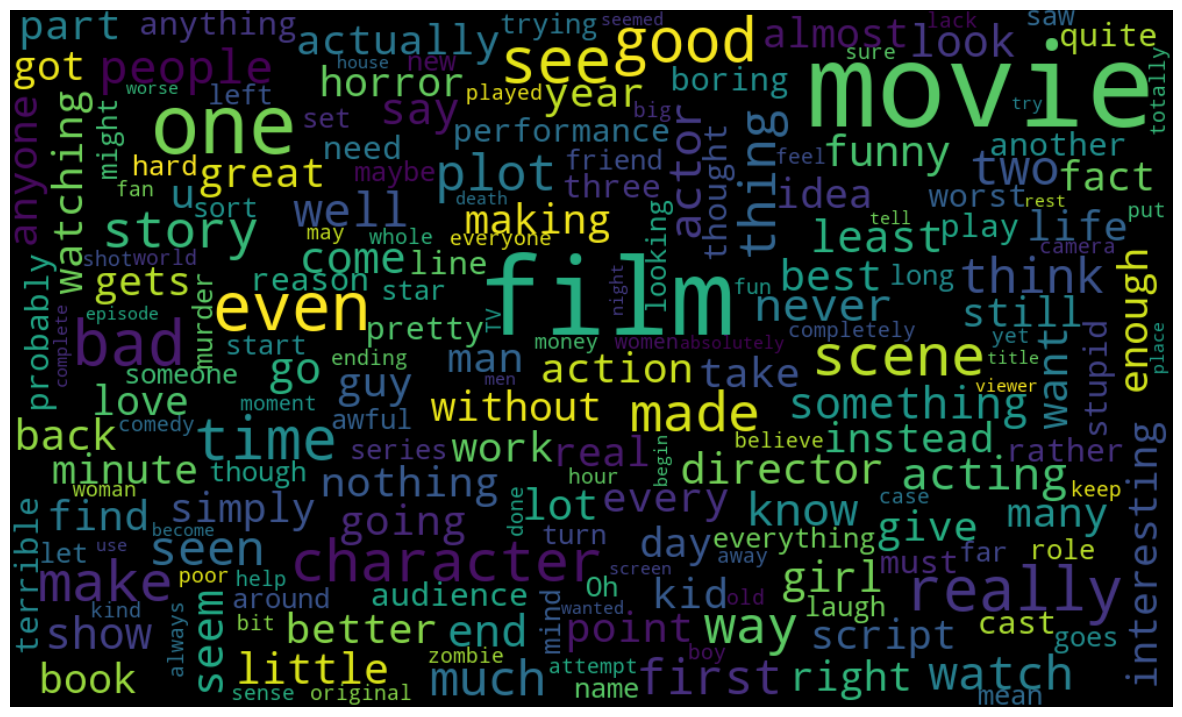

In [11]:
# Drawing a WordCloud visualization for negative sentiment reviews.

# Concatenating all words from the 'review' column for entries with 'negative' sentiment.
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'negative'].astype(str))

# Creating a WordCloud object with specified dimensions and maximum font size.
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Setting up the plot size and displaying the generated WordCloud.
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


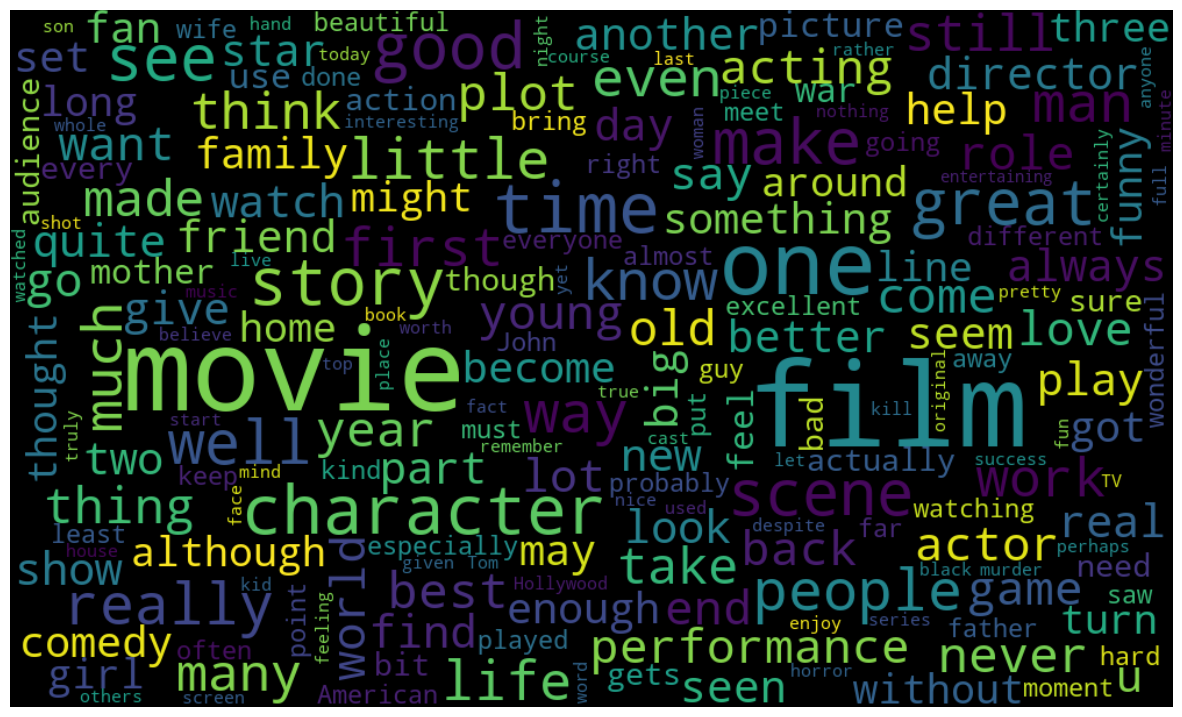

In [12]:
# Drawing a WordCloud visualization for negative sentiment reviews.

# Concatenating all words from the 'review' column for entries with 'positive' sentiment.
reviews = ' '.join(word for word in data['review'][data['sentiment'] == 'positive'].astype(str))

# Creating a WordCloud object with specified dimensions and maximum font size.
wordcloud = WordCloud(height=600, width=1000, max_font_size=100)

# Setting up the plot size and displaying the generated WordCloud.
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

**Feature Engineering** -
*Feature Extraction*

Text Feature Extraction: TF-IDF Vectorizer Initialization

In [13]:
# Importing the TfidfVectorizer from scikit-learn for text feature extraction based on TF-IDF (Term Frequency-Inverse Document Frequency).
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TfidfVectorizer instance with a specified maximum number of features (max_features).
cv = TfidfVectorizer(max_features=2500)


In [14]:
# Applying the TfidfVectorizer to transform the 'review' column in the DataFrame 'data' into a TF-IDF matrix.
reviews = cv.fit_transform(data['review']).toarray()


In [15]:
# Replacing sentiment labels 'positive' with 1 and 'negative' with 0 in the 'sentiment' column of the DataFrame 'data'.
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])


C:\Users\Krutika\AppData\Local\Temp\ipykernel_14556\87245247.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])


In [16]:
data['sentiment'].value_counts()

sentiment
0    263
1    237
Name: count, dtype: int64

**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [21]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [22]:
predict = model.predict(reviews_test)

**Model Evaluation: Confusion Matrix Visualization**

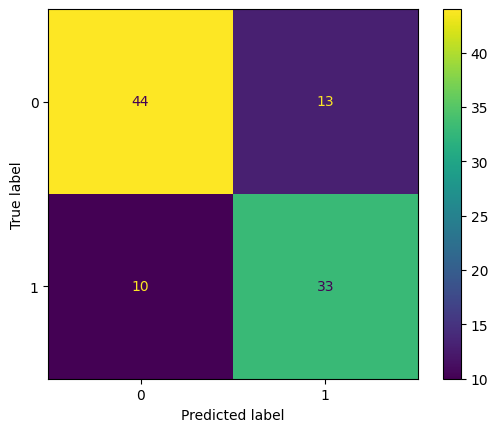

In [23]:
# Importing necessary modules for evaluating the model's performance using a confusion matrix.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating a confusion matrix based on the predicted and actual sentiment labels.
cm = confusion_matrix(sent_test, predict, labels=model.classes_)

# Creating a ConfusionMatrixDisplay for better visualization of the confusion matrix.
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plotting the confusion matrix.
display.plot()
plt.show()


No of times model accurately predicted negative review as negative = 42

No of times model predicted negative review as positivee = 11

No of times model accurately predicted positive review as positive = 32

No of times model predicted positive review as negative = 15